# Pack Stats

In [1]:
import pymc3 as pm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

In [12]:
packs_raw = pd.read_csv('./1.09/MEA_Patch_1_09.csv')
packs_raw.head()

,Date,Pack,AP/Creds,Price,Notes,Common (C/W),Uncommon (C/W),Rare Mod,Rare Weap.,Rare Char.,UR Weap.,UR Char.,1 Level booster,2 Level booster,3 Level booster,4 Level booster,N. Consumbales,Variant present,Ultra Rares
0,6-Jul-17,Basic,Credits,5000,Bronze char unfin; Bronze mod variants unfin; ...,1,0,0,0,0,0,0,0,1,0,0,3,No,NaN
1,6-Jul-17,Basic,Credits,5000,Bronze char unfin; Bronze mod variants unfin; ...,2,0,0,0,0,0,0,1,0,0,0,2,No,NaN
2,6-Jul-17,Advanced,Credits,20000,Bronze char unfin; Bronze mod variants unfin; ...,0,1,0,0,0,0,0,1,0,0,0,3,No,NaN
3,6-Jul-17,Basic,Credits,5000,Bronze char unfin; Bronze mod variants unfin; ...,2,0,0,0,0,0,0,1,0,0,0,2,No,NaN
4,6-Jul-17,Basic,Credits,5000,Bronze char unfin; Bronze mod variants unfin; ...,1,0,0,0,0,0,0,1,0,0,0,3,No,NaN


In [13]:
packs_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 19 columns):
Date               153 non-null object
Pack               153 non-null object
AP/Creds           153 non-null object
Price              153 non-null int64
Notes              153 non-null object
Common (C/W)       153 non-null int64
Uncommon (C/W)     153 non-null int64
Rare Mod           153 non-null int64
Rare Weap.         153 non-null int64
Rare Char.         153 non-null int64
UR Weap.           153 non-null int64
UR Char.           153 non-null int64
1 Level booster    153 non-null int64
2 Level booster    153 non-null int64
3 Level booster    153 non-null int64
4 Level booster    153 non-null int64
N. Consumbales     153 non-null int64
Variant present    153 non-null object
Ultra Rares        58 non-null object
dtypes: int64(13), object(6)
memory usage: 22.8+ KB


In [14]:
packs_raw_1_10 = pd.read_csv('./1.10/MEA_Patch_1_10.csv')

In [15]:
packs_raw_1_10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 19 columns):
Date               75 non-null object
Pack               75 non-null object
AP/Creds           75 non-null object
Price              75 non-null int64
Notes              75 non-null object
Common (C/W)       75 non-null int64
Uncommon (C/W)     75 non-null int64
Rare Mod           75 non-null int64
Rare Weap.         75 non-null int64
Rare Char.         75 non-null int64
UR Weap.           75 non-null int64
UR Char.           75 non-null int64
1 Level booster    75 non-null int64
2 Level booster    75 non-null int64
3 Level booster    75 non-null int64
4 Level booster    75 non-null int64
N. Consumbales     75 non-null int64
Variant present    75 non-null object
Ultra Rares        22 non-null object
dtypes: int64(13), object(6)
memory usage: 11.2+ KB


In [16]:
packs_raw = packs_raw.append(packs_raw_1_10)

In [17]:
packs_raw['Notes'].value_counts()

Bronze char unfin; Bronze mod variants unfin; Silver mod unfin; Silver mod variants unfin; Silver weap unfin; Silver weap variants unfin; Silver char unfin; Gold mod variants unfin; Gold weap unfin; Gold weap variants unfin; Gold char Unfin; UR weap unfin; UR char unfin    141
Bronze mod variants unfin; Silver mod unfin; Silver mod variants unfin; Silver weap unfin; Silver weap variants unfin; Silver char unfin; Gold mod variants unfin; Gold weap unfin; Gold weap variants unfin; UR weap unfin; UR char unfin                                         34
Bronze mod variants unfin; Silver mod unfin; Silver mod variants unfin; Silver weap unfin; Silver weap variants unfin; Silver char unfin; Gold mod variants unfin; Gold weap unfin; Gold weap variants unfin; Gold char unfin; UR weap unfin; UR char unfin                        28
Bronze mod variants unfin; Silver mod unfin; Silver mod variants unfin; Silver weap unfin; Silver weap variants unfin; Silver char unfin; Gold mod variants unfin; Gol

In [18]:
packs_raw['Pack'].value_counts()

Reserves        74
Arsenal         42
Advanced        35
Basic           31
Jumbo Supply    18
Premium         13
Expert          10
Apex Elite       5
Name: Pack, dtype: int64

In [27]:
n_reserves = 0
prem_types = ['Arsenal', 'Reserves', 'Premium']
for b in prem_types:
    n_reserves += len(packs_raw[packs_raw['Pack'] == b])
print('Number of "premium tier" packs =', n_reserves)

prem_idx = packs_raw['Pack'] == prem_types[0]
for i in range(1, len(prem_types)):
    prem_idx |= packs_raw['Pack'] == prem_types[i]

n_ur_weap = np.sum(packs_raw[prem_idx]['UR Weap.'])
print('Number of UR weapons =', n_ur_weap)

n_ur_char = np.sum(packs_raw[prem_idx]['UR Char.'])
print('Number of UR characters =', n_ur_char)

n_ur_boost = np.sum(packs_raw[prem_idx]['4 Level booster'])
print('Number of UR boosters =', n_ur_boost)

Number of "premium tier" packs = 129
Number of UR weapons = 16
Number of UR characters = 22
Number of UR boosters = 40


Suppose the probability of a UR character is twice that of a UR weapon...

(array([   16.,   162.,   770.,   865.,  2822.,  3114.,  1113.,   988.,
          143.,     7.]),
 array([  8. ,   9.7,  11.4,  13.1,  14.8,  16.5,  18.2,  19.9,  21.6,
         23.3,  25. ]),
 <a list of 10 Patch objects>)

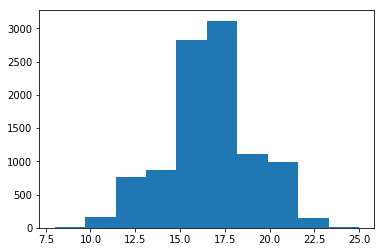

In [28]:
p_c = 0.666
p_w = 1.0 - p_c
C = stats.binom(n=25, p=p_c)
data = C.rvs(10000)
plt.hist(data)

In [29]:
np.sum(data <= 12)

443

In [30]:
v1 = data <= 12
v2 = data >= 20

In [31]:
38 / 129

0.29457364341085274

In [32]:
38 / (129 * 2)

0.14728682170542637